## Assignment 1
### Name: Anuguru Parthiv Reddy
### Roll Number: 21CS10006

In [171]:
# import all the necessary libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [172]:
df = pd.read_csv('../../dataset/linear-regression.csv')

print(df.isna().sum())

# Feature normalization
def normalize_features(X):
    means = np.mean(X, axis=0)
    stds = np.std(X, axis=0)
    normalized_X = (X - means) / stds
    return normalized_X

X=df[df.columns[0:11]].values
y=df[df.columns[11]].values

X=normalize_features(X)
y=normalize_features(y)

MODEL 1 (Analytical Solution)

In [173]:
#print(X)
#print(y)
# Split the data into training, validation and test sets
total_samples = X.shape[0]
train_samples = int(total_samples * 0.5)
validation_samples = int(total_samples * 0.3)
test_samples = total_samples - train_samples - validation_samples

X_train = X[:train_samples]
y_train = y[:train_samples]
X_validation = X[train_samples:train_samples + validation_samples]
y_validation = y[train_samples:train_samples + validation_samples]
X_test = X[train_samples + validation_samples:]
y_test = y[train_samples + validation_samples:]

# Add bias term to the features
X_train_with_bias = np.c_[np.ones(X_train.shape[0]), X_train]

#Normal Equation MODEL 1
theta = np.linalg.inv(X_train_with_bias.T @ X_train_with_bias) @ X_train_with_bias.T @ y_train

#print("Best theta:", theta)

In [174]:
#TEST DATA
X_test_with_bias = np.c_[np.ones(X_test.shape[0]), X_test]
X_validation_with_bias = np.c_[np.ones(X_validation.shape[0]), X_validation]
# Calculate predictions for the test data
y_validation_pred = X_validation_with_bias @ theta
y_test_pred = X_test_with_bias @ theta

# Calculate R-squared score
def r_squared(y_true, y_pred):
    mean_y = np.mean(y_true)
    ss_total = np.sum((y_true - mean_y) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2
    
r2_validation = r_squared(y_validation, y_validation_pred)
print("R-squared score for validation data:", r2_validation)

r2_test = r_squared(y_test, y_test_pred)
print("R-squared score for test data:", r2_test)

# Calculate RMSE score
def rmse(y_true, y_pred):
    mse = np.mean((y_true - y_pred) ** 2)
    rmse = np.sqrt(mse)
    return rmse

rmse_validation = rmse(y_validation, y_validation_pred)
print("RMSE score for validation data:", rmse_validation)

rmse_test = rmse(y_test, y_test_pred)
print("RMSE score for test data:", rmse_test)

R-squared score for validation data: 0.36672744774639876
R-squared score for test data: 0.257382417445839
RMSE score for validation data: 0.8395160136313361
RMSE score for test data: 0.8298790955714368


MODEL 2 (Gradient Ascent)


Validation set==> alpha: 0.01 RMSE: 0.8395160136313362 R2: 0.36672744774639865
Test set      ==> alpha: 0.01 RMSE: 0.8298790955714364 R2: 0.2573824174458399


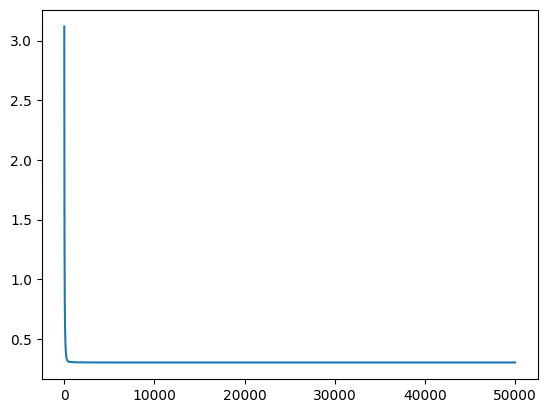

Validation set==> alpha: 0.001 RMSE: 0.839528679370662 R2: 0.36670833929475755
Test set      ==> alpha: 0.001 RMSE: 0.8301156167560019 R2: 0.2569590550037153


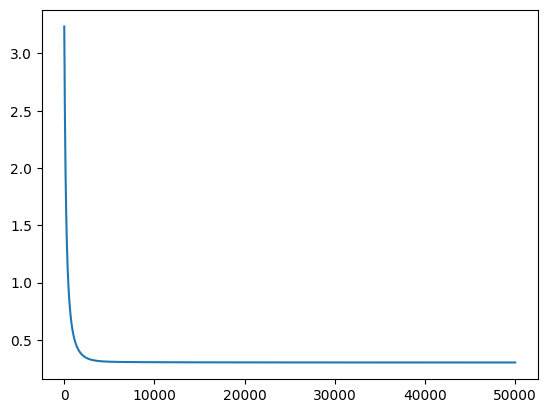

Validation set==> alpha: 0.0001 RMSE: 0.847258260701899 R2: 0.3549931611583791
Test set      ==> alpha: 0.0001 RMSE: 0.8487901106811597 R2: 0.22315173615109374


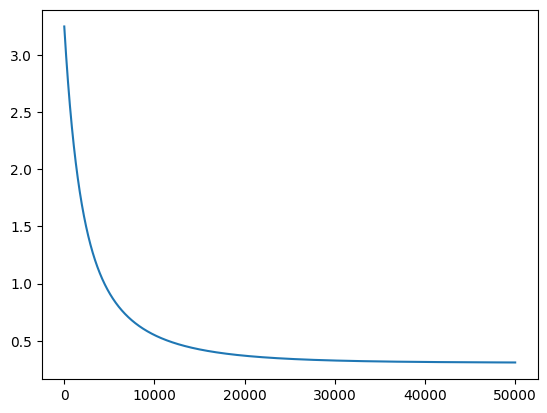

In [175]:
def compute_cost(X, y, w):
  m, n = X.shape
  cost = np.transpose((X@w - y))@(X@w - y)
  total_cost = cost/(2*m)
  return total_cost

def compute_gradient(X, y, w):
  m,n = X.shape
  dj_dw = np.transpose(X)@(X@w-y)
  dj_dw /= m

  return dj_dw

def gradient_descent(X,y,w_in,cost_function,gradient_function,alpha,num_iters):
  m, n = X.shape

  J_history = []
  w_history = []

  for i in range(num_iters):
    dj_dw = gradient_function(X,y,w_in)#gradient ascnet

    w_in = w_in - alpha * dj_dw #we move in opposite direction of ascent 

    cost = cost_function(X,y,w_in)
    J_history.append(cost)

  return w_in, J_history

def evaluate(x_train, y_train, x_test, y_test, x_validate, y_validate, w, alpha, epochs):
  w, cost_list = gradient_descent(x_train, y_train, w, compute_cost, compute_gradient, alpha, epochs)
  y_pred=x_validate@w
  print(f"Validation set==> alpha: {alpha} RMSE: {rmse(y_validate, y_pred)} R2: {r_squared(y_validate, y_pred)}")
  y_pred=x_test@w
  print(f"Test set      ==> alpha: {alpha} RMSE: {rmse(y_test, y_pred)} R2: {r_squared(y_test, y_pred)}")
  #loss on y axis iterations on x axis
  cost_list = np.array(cost_list)
  plt.plot(cost_list, linestyle = 'solid')
  plt.show()

alpha1 = 0.01
alpha2 = 0.001
alpha3 = 0.0001

epochs = 50000

w = np.random.rand(12)
w[0] = 1

evaluate(X_train_with_bias, y_train, X_test_with_bias, y_test, X_validation_with_bias, y_validation, w, alpha1, epochs)
evaluate(X_train_with_bias, y_train, X_test_with_bias, y_test, X_validation_with_bias, y_validation, w, alpha2, epochs)
evaluate(X_train_with_bias, y_train, X_test_with_bias, y_test, X_validation_with_bias, y_validation, w, alpha3, epochs)